In [2]:
import re
import os
import pandas as pd
import bs4
import numpy as np
import requests
import networkx as nx
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 



import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
list(os.listdir('data/manually_collected/text'))

['DP145929.txt',
 'DP143209.txt',
 'vanitas_de_heem.txt',
 'cc9d5194d30a98041.txt',
 'vanitas_gheyn.txt',
 'pl9_37682_fnt_sl_c80.txt',
 '10450.txt',
 'SAN_VOL2BMA.txt',
 'mh_1993_14_v1-cdm.txt',
 '.ipynb_checkpoints',
 '0_original.txt']

In [64]:
text_dir = 'data/manually_collected/text'

# DG = nx.DiGraph()

# Include coloured (signified and signifiers) and directed labels 
# Derive an adjacency matrix from the graph

for text_file in ['mh_1993_14_v1-cdm.txt']: #os.listdir('data/manually_collected/text'):
    with open(os.path.join(text_dir, text_file), 'r') as handle:
        caption = handle.readlines()[0]
        print(caption)
        item =  None
        meaning = None
        while True:
            print('Provide item')
            item = input()
            print('Provide meaning')
            meaning = input()
            if item == 'finish' or meaning == 'finish':
                break
            
            DG.add_node(item)
            DG.add_node(meaning)
            DG.add_edge(item, meaning)

Before you read further, take a few moments to just look at this remarkably detailed painting. As your eyes move across the canvas, try to identify the objects that you see on the table. Often when we think of a still-life, we imagine a painting of fruit or flowers, so you might be surprised by some of the objects you see. This is a vanitas—a specific type of still-life that emerged in the 17th century in the Netherlands and grew out of a long artistic tradition known as memento mori, meaning “reminders of mortality.” While looking closely at this painting, you probably noticed several objects that could be called reminders of mortality, such as the skull, the wilting tulip, and the dying wick of the candle.  Vanitas still-lifes were appreciated for both their beauty, rendered in incredible detail, and for their deeper symbolic significance. Andriessen’s contemporary audience may have recognized the crown as a specific, haunting reference to the recent execution of King Charles I of En

(-1.0704802877316928,
 1.1313283660602984,
 -1.1703564581880703,
 1.206232966615156)

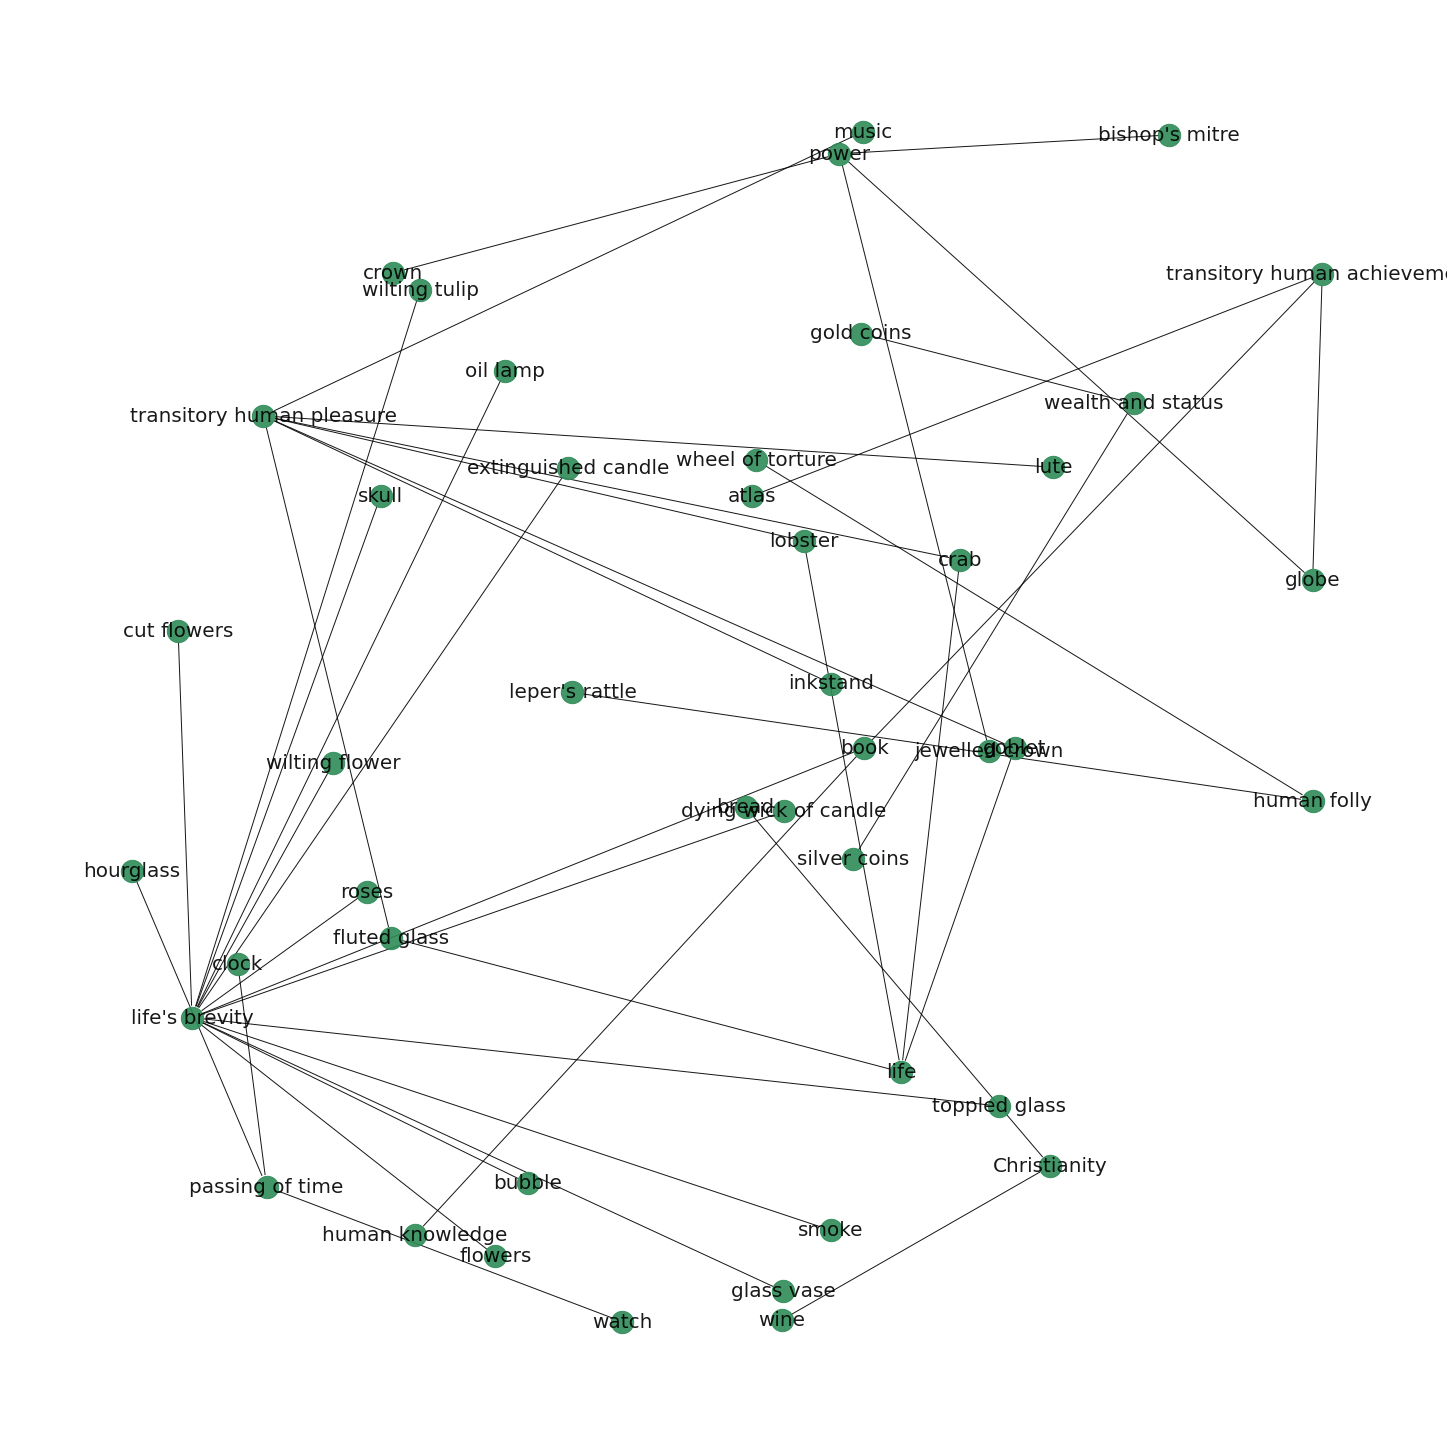

In [65]:

pos = nx.spring_layout(DG, k=3*1/np.sqrt(len(DG.nodes())), iterations=20)
plt.figure(figsize=(20,20))
nx.draw(DG, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, arrowsize=0.001, node_color='seagreen', alpha=0.9,
            labels={node: node for node in DG.nodes()}, font_size=20)
plt.axis('off')

In [66]:
# DG = nx.DiGraph()
nx.descendants(DG, 'smoke')

{"life's brevity"}

In [78]:
nx.write_gpickle(DG, "vanitas.gpickle") 
DG = nx.read_gpickle("vanitas.gpickle") 

In [79]:
list(DG.nodes)

['toppled glass',
 "life's brevity",
 'skull',
 'oil lamp',
 'bubble',
 'cut flowers',
 'wheel of torture',
 'human folly',
 "leper's rattle",
 'book',
 'roses',
 'human knowledge',
 'gold coins',
 'wealth and status',
 'silver coins',
 'clock',
 'passing of time',
 'atlas',
 'transitory human achievement',
 'lute',
 'transitory human pleasure',
 'music',
 'inkstand',
 'hourglass',
 'fluted glass',
 'life',
 'goblet',
 'lobster',
 'crab',
 'watch',
 'globe',
 'power',
 'bread',
 'Christianity',
 'wine',
 'smoke',
 'wilting tulip',
 'dying wick of candle',
 'wilting flower',
 'flowers',
 'extinguished candle',
 'glass vase',
 'jewelled crown',
 'crown',
 "bishop's mitre"]

In [80]:
admatix = nx.adjacency_matrix(DG).todense()

In [81]:
admatix.shape

(45, 45)

In [82]:
len(DG.nodes)

45

In [83]:
admatix

matrix([[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [73]:
np.savetxt("KGadjacencyMatrix.csv", np.array(admatix, dtype=np.int), delimiter=",")

In [74]:
np.array(admatix, dtype = np.int)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
import csv
with open('node_list.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(list(DG.nodes))